# 1. 데이터 로드 및 기본 정보

In [1]:
# 1. 데이터 로드 및 라이브러리 임포트
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Matplotlib 한글 폰트 설정 (Colab 환경 기준)
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

plt.rc('font', family='NanumGothic')
plt.rcParams['axes.unicode_minus'] = False # 마이너스 폰트 깨짐 방지

# data 폴더에 저장된 CSV 파일 경로
DATA_PATH = '/bin/X11/data/slack_calendar_data.csv'

# 데이터 읽기
try:
    df = pd.read_csv(DATA_PATH, encoding='utf-8')
    print("데이터 로드 성공!")
except FileNotFoundError:
    print(f"오류: {DATA_PATH} 파일을 찾을 수 없습니다. 경로와 파일명을 확인해주세요.")
    df = pd.DataFrame() # 오류 방지용 빈 데이터프레임 생성

# 데이터 크기 확인
print("\n[데이터 크기]")
print(f"총 행 수: {df.shape[0]}개, 총 컬럼 수: {df.shape[1]}개")

# 컬럼 및 데이터 타입 확인
print("\n[컬럼 및 데이터 타입]")
df.info()

# 데이터 샘플 확인
print("\n[데이터 샘플 (5개)]")
print(df.head())

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 41 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

# 2. 기본 통계 및 결측치 분석

In [2]:
# 기술 통계 확인 (Categorical 데이터에 적용)
print("\n[범주형 데이터 기술 통계]")
print(df.describe(include=['object']))

# message 길이 통계 (추가 분석 요소)
df['message_length'] = df['message'].apply(lambda x: len(str(x)))
print("\n[메시지 길이 통계 (문자 수)]")
print(df['message_length'].describe())

# 결측값 확인
print("\n[결측값 (Null 값) 확인]")
print(df.isnull().sum())

# date_info_parsed 컬럼의 고유값 분포 확인
print("\n[일정 생성 필요 여부 (date_info_parsed) 분포]")
print(df['date_info_parsed'].value_counts())


[범주형 데이터 기술 통계]
                                   message title date_info_parsed location
count                                 1000  1000             1000      632
unique                                 809    16                2       12
top     중간고사 이후 식사 자리에 함께하실 분은 체크표시 눌러주세요.     -                O        -
freq                                     9   300              700      479

[메시지 길이 통계 (문자 수)]
count    1000.000000
mean       37.925000
std        10.692226
min        12.000000
25%        31.000000
50%        38.000000
75%        45.000000
max        72.000000
Name: message_length, dtype: float64

[결측값 (Null 값) 확인]
message               0
title                 0
date_info_parsed      0
location            368
message_length        0
dtype: int64

[일정 생성 필요 여부 (date_info_parsed) 분포]
date_info_parsed
O    700
X    300
Name: count, dtype: int64


# 3. 시각화

/tmp/ipython-input-1530281563.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='date_info_parsed', data=df, palette='viridis')


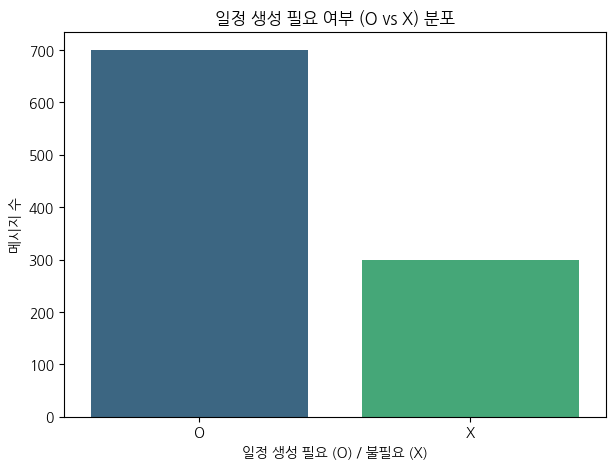

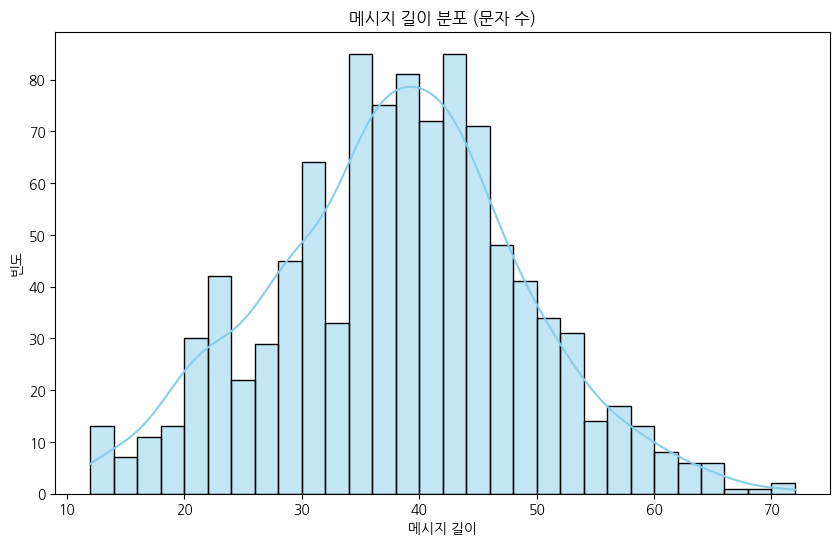

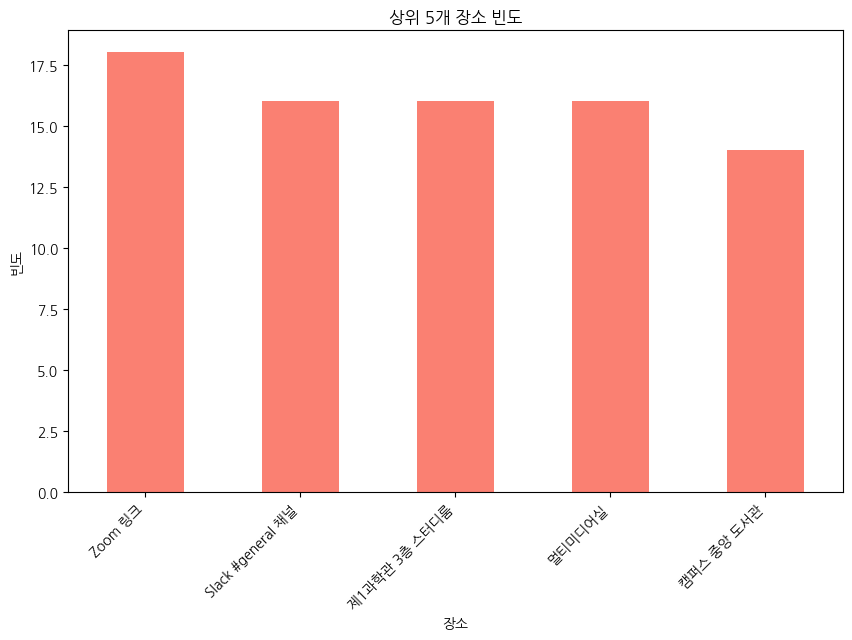

In [3]:
# 3. 시각화 (Visualization)

# 3.1. 시각화 1: 일정 생성 필요 여부 분포 (Bar Chart)
plt.figure(figsize=(7, 5))
sns.countplot(x='date_info_parsed', data=df, palette='viridis')
plt.title('일정 생성 필요 여부 (O vs X) 분포')
plt.xlabel('일정 생성 필요 (O) / 불필요 (X)')
plt.ylabel('메시지 수')
plt.show()

# 3.2. 시각화 2: 메시지 길이 분포 (Histogram)
plt.figure(figsize=(10, 6))
sns.histplot(df['message_length'], bins=30, kde=True, color='skyblue')
plt.title('메시지 길이 분포 (문자 수)')
plt.xlabel('메시지 길이')
plt.ylabel('빈도')
plt.show()

# 3.3. 시각화 3: 장소 정보 빈도 (Top 5 Bar Chart)
# '-'는 제외하고 상위 5개 장소 추출
top_locations = df['location'].value_counts().drop(labels=['-'], errors='ignore').nlargest(5)

plt.figure(figsize=(10, 6))
top_locations.plot(kind='bar', color='salmon')
plt.title('상위 5개 장소 빈도')
plt.xlabel('장소')
plt.ylabel('빈도')
plt.xticks(rotation=45, ha='right')
plt.show()

# 4. 분석 및 발견 사항


### 4.1. 데이터 특성 및 분포

현재 데이터셋은 **총 1,000개의 메시지 샘플**로 구성되어 있으며, 이는 초기 모델 학습 및 탐색적 데이터 분석(EDA)을 위한 충분한 규모입니다.

* **일정 생성 필요 여부 (`O` vs `X`)**:
    * 일정 생성 요청 메시지 **('O')가 700개**로 전체의 **70%**를 차지합니다.
    * 일정 요청이 아닌 일반 메시지 **('X')가 300개**로 **30%**를 차지합니다.
    * 이는 의도적으로 긍정 샘플을 높게 설정하여 모델이 **일정 요청 패턴**을 확실히 학습하도록 유도하며, 부정 샘플을 통해 **메시지 분류 능력**을 갖추도록 설계되었습니다.

* **메시지 길이**:
    * 메시지 길이는 **평균 약 37.9자**이며, 최소 12자에서 최대 72자까지 분포합니다.
    * **발견**: 대부분의 Slack 메시지가 **짧고 간결한 구어체 명령형** 문장으로 구성되어 있음을 시사합니다. 모델은 긴 문맥보다는 **핵심 엔티티** 추출에 집중해야 합니다.



### 4.2. 주요 발견 사항 및 패턴 분석

#### ① 장소 정보의 높은 희소성

* **결측치 확인**: 총 1,000개의 메시지 중 **368개의 행**에서 `location` 정보가 누락(결측치)된 것으로 확인되었습니다.
    * 'X' 메시지(300개)를 제외하더라도 'O' 메시지 중 상당수가 장소 정보 없이 **온라인**이거나 **장소 미정**임을 의미합니다.
* **장소 유형 다양화**: 장소 엔티티는 다음과 같이 다양하게 분포되어 있습니다.
    * **온라인 장소**: '온라인 Google Meet', 'Zoom 링크' 등.
    * **구체적인 물리적 장소**: '글로벌캠퍼스 공학관 5208호', '학생회관 405호' 등 **건물/호수 조합** 형태.

#### ② 날짜/시간 표현의 비정형성

* **문제점**: 메시지에는 `다음 주 월요일`, `내일 오후`와 같은 **상대적 시간 표현**과 `10월 28일 (화요일)`, `21시 ~ 22시`와 같은 **절대적/범위 표현**이 혼재되어 있습니다.
* **패턴 반영**: 실제 Slack 패턴인 **요일 포함 날짜**(`10월 28일 (화요일)`)나 **기간 표현**(`15:00 ~ 18:00`)이 반영되어 있어, 모델의 **날짜/시간 정규화(Normalization)**가 학습 성공의 핵심이 될 것입니다.

#### ③ 메시지 의도 분류의 필요성

* **발견**: `GTL 타임테이블 신청은 마감되었습니다.` 또는 `중간고사 이후 식사 자리에 함께하실 분은 체크표시 눌러주세요.`와 같이 **날짜/시간 키워드**를 포함하지만 **일정 생성이 불필요한** 부정 샘플이 존재합니다.
* **시사점**: 모델은 단순히 날짜/시간 엔티티 추출을 넘어, **문장의 명령/요청 의도**를 파악하여 **일정 생성 여부를 1차적으로 분류**하는 분류기(Classifier) 역할도 수행해야 합니다.



### 4.3. 데이터 품질 문제 및 향후 전처리 계획

1.  **날짜/시간 정규화 파이프라인 구축**:
    * `다음 주 월요일` 같은 상대적 표현을 **ISO 8601 표준 형식(YYYY-MM-DD HH:MM:SS)**으로 변환하는 **시간 파서(Time Parser)** 모듈을 전처리 단계에 반드시 포함해야 합니다.
2.  **`location` 결측치 처리**:
    * `location` 컬럼의 결측치(NaN)는 **장소 정보 없음**을 의미합니다. 이 값을 모델이 학습할 수 있도록 **'-'(장소 없음)**이라는 유효한 토큰으로 대체하여 처리합니다.
3.  **고유명사 및 약어 처리**:
    * `[GTL]`, `[Expo]`와 같은 **고유명사 및 약어**가 제목이나 메시지 내용에 자주 등장합니다. 모델이 이들을 하나의 **개체(Entity)**로 인식하도록 사전 기반 학습이나 NER 태깅 전략을 수립해야 합니다.